In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
# Load reference datasets
countries  = pd.read_csv('../raw_data/CountriesList.txt', delimiter=' , ', index_col='Country Code')

latlong = pd.read_csv('../raw_data/LatLong.csv', index_col='Alpha-3',
                      usecols=['Alpha-3', 'lat', 'long'])

good_indices = (countries.index & latlong.index)

# Columns
label_cols = ['Country Name', 'Country Code']
year_cols = ['1990', '1995', '2000', '2005', '2010', '2015']
keep_cols = label_cols + year_cols
pop = pd.read_csv('../raw_data/Population.csv',
                  index_col='Country Code', usecols=keep_cols)
pop = pop.reindex(pop.index & good_indices)

/home/ross/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app


## Unemployment

In [32]:
# Using 1991 for 1990 b/c 1990 is full of NaN's
un_year_cols = ['1991', '1995', '2000', '2005', '2010', '2015']
unEmp = pd.read_csv('../raw_data/WB_Unemployment.csv',
                    index_col='Country Code', usecols=label_cols+un_year_cols)
unEmp = unEmp.reindex(unEmp.index & good_indices)
unEmp.rename(columns={'1991': '1990'}, inplace=True)
unEmp[unEmp.isnull().any(axis=1)]

,Country Name,1990,1995,2000,2005,2010,2015
GRL,Greenland,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
print(unEmp[year_cols].max().max(), unEmp[year_cols].min().min())

37.2700004578 0.16400000453


In [37]:
# Drop GRL and write to csv
#unEmp.drop('GRL', inplace=True)
unEmp.to_csv('../processed_data/Unemployment.csv', index_label='id')

## Refugees

In [40]:
refOrig = pd.read_csv('../raw_data/WB_RefugeesOrigin.csv',
                    index_col='Country Code', usecols=keep_cols)
refOrig = refOrig.reindex(refOrig.index & good_indices)

refDest = pd.read_csv('../raw_data/WB_RefugeesDest.csv',
                    index_col='Country Code', usecols=keep_cols)
refDest = refDest.reindex(refDest.index & good_indices)

print(refOrig.shape, refDest.shape)

(168, 7) (168, 7)


In [49]:
netRefugees = pd.DataFrame(refDest['Country Name'])
netRefugees[year_cols] = refDest[year_cols].subtract(refOrig[year_cols], fill_value=0)
netRefugees.fillna(0.0, inplace=True)

In [59]:
ref_per_cap = netRefugees.copy()
for year in year_cols:
    ref_per_cap[year] = ref_per_cap[year] / pop[year]
ref_per_cap

,Country Name,1990,1995,2000,2005,2010,2015
AFG,Afghanistan,-5.175105e-01,-0.155532,-0.178530,-0.086400,-1.058312e-01,-0.071399
AGO,Angola,-3.255186e-02,-0.016523,-0.025648,-0.010323,-5.122270e-03,0.000132
ALB,Albania,-5.543821e-04,-0.000340,-0.002033,-0.004206,-5.044934e-03,-0.003577
ARE,United Arab Emirates,0.000000e+00,0.000166,0.000173,0.000016,1.378362e-05,0.000062
ARG,Argentina,3.483376e-04,0.000285,0.000048,0.000057,6.595690e-05,0.000069
ARM,Armenia,-2.826324e-07,0.005442,0.089525,0.068959,-4.952888e-03,0.002779
AUS,Australia,5.737734e-03,0.003439,0.003145,0.003183,9.880286e-04,0.001551
AUT,Austria,4.550493e-03,0.004320,0.001929,0.002572,5.096011e-03,0.008364
AZE,Azerbaijan,0.000000e+00,0.004315,-0.035284,-0.027488,-1.641424e-03,-0.000874
BDI,Burundi,1.417823e-02,-0.029783,-0.084514,-0.056313,-6.239242e-03,-0.023472


In [60]:
print(ref_per_cap[year_cols].max().max(), ref_per_cap[year_cols].min().min())

0.504455666629 -0.517510490963


In [61]:
ref_per_cap.to_csv('../processed_data/NetRefugees_per_cap.csv', index_label='id')

## Life Expectancy

In [69]:
# Using 1991 for 1990 b/c 1990 is full of NaN's
lifeExp = pd.read_csv('../raw_data/WB_LifeExpect.csv',
                    index_col='Country Code', usecols=keep_cols)
lifeExp = lifeExp.reindex(unEmp.index & good_indices)
lifeExp.drop('SRB', inplace=True)
lifeExp[lifeExp.isnull().any(axis=1)]

,Country Name,1990,1995,2000,2005,2010,2015


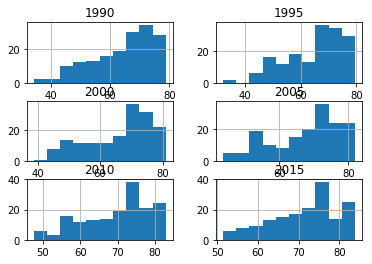

In [73]:
lifeExp.hist()
plt.show()

In [74]:
print(lifeExp[year_cols].max().max(), lifeExp[year_cols].min().min())

83.8436585366 31.9643902439


In [75]:
lifeExp.to_csv('../processed_data/LifeExpectancy.csv', index_label='id')

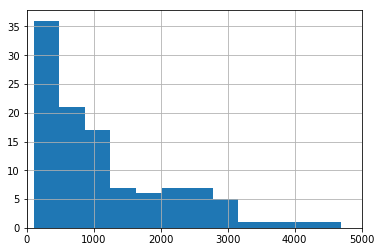

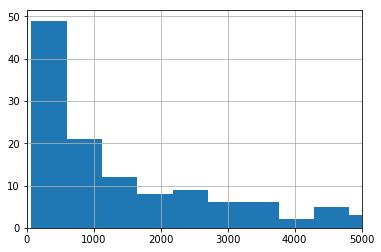

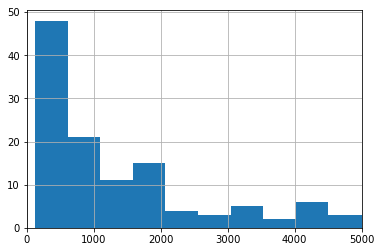

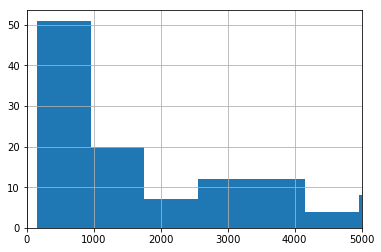

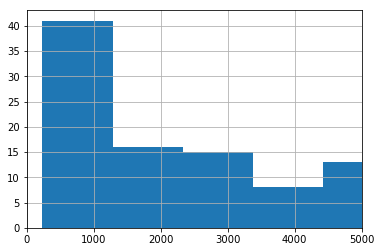

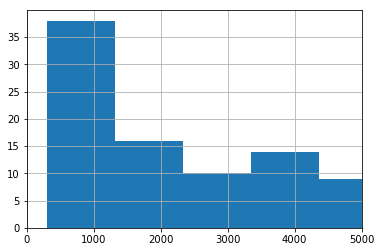

In [87]:
gdp = pd.read_csv('../processed_data/GDP_per_capita.csv', index_col='id')
for year in year_cols:
    gdp[year].where(gdp[year] > 0).hist(bins=100)
    plt.xlim([0,5000])
    plt.show()


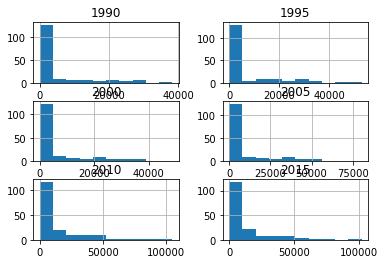